# The first taste of CNN - > RNN
## Read the data-Cifar10

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

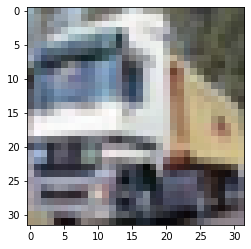

In [4]:
plt.imshow(x_train[1])
plt.show()

## to_categorical the labels

In [5]:
# 对label 进行one-hot
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [6]:
# 32 X 32 RGB image
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(50000, 32, 32, 3)   (50000, 10)
(10000, 32, 32, 3)   (10000, 10)


## Build the model
### CNN layer

In [7]:
model = keras.Sequential()
x_shape = x_train.shape
# if layers is the first layer, need to use 'input_shape=()'
model.add(layers.Conv2D(input_shape=(x_shape[1], x_shape[2], x_shape[3]),
                       filters=32, kernel_size=(3,3), strides=(1,1), 
                       padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

In [8]:
print(model.output_shape)

(None, 16, 16, 32)


### RNN layer

In [9]:
model.add(layers.Reshape(target_shape=(16*16, 32)))
model.add(layers.LSTM(50, return_sequences=False))

model.add(layers.Dense(10, activation='softmax'))

## Compile the model

In [10]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
reshape (Reshape)            (None, 256, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dense (Dense)                (None, 10)                510       
Total params: 18,006
Trainable params: 18,006
Non-trainable params: 0
_________________________________________________________________


## Train the model

In [11]:
history = model.fit(x_train, y_train, batch_size=32,epochs=5, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 456s 10ms/sample - loss: 2.1586 - accuracy: 0.1970 - val_loss: 2.1037 - val_accuracy: 0.2280
Epoch 2/5
45000/45000 [==============================] - 460s 10ms/sample - loss: 1.9891 - accuracy: 0.2655 - val_loss: 1.9510 - val_accuracy: 0.2766
Epoch 3/5
45000/45000 [==============================] - 466s 10ms/sample - loss: 1.8841 - accuracy: 0.3030 - val_loss: 1.8433 - val_accuracy: 0.3118
Epoch 4/5
45000/45000 [==============================] - 460s 10ms/sample - loss: 1.7606 - accuracy: 0.3432 - val_loss: 1.7262 - val_accuracy: 0.3606
Epoch 5/5
45000/45000 [==============================] - 465s 10ms/sample - loss: 1.6776 - accuracy: 0.3818 - val_loss: 1.6311 - val_accuracy: 0.3990


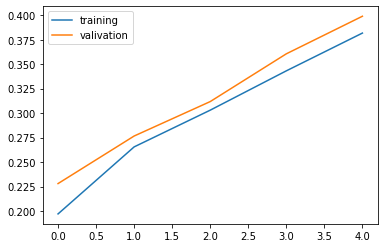

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

## Evaluate the model

In [13]:
res_1 = model.evaluate(x_test,y_test)
print('loss: {:.3f}, accuracy: {:.3f}'.format(res_1[0], res_1[1]))

10000/10000 [==============================] - 19s 2ms/sample - loss: 1.6391 - accuracy: 0.3940
loss: 1.639, accuracy: 0.394


# CNN+RNN combination
## Build the model
### CNN layer

In [14]:
x_shape = x_train.shape
inn = layers.Input(shape=(x_shape[1], x_shape[2], x_shape[3]))
conv = layers.Conv2D(filters=32,kernel_size=(3,3), strides=(1,1),
                    padding='same', activation='relu')(inn)
pool = layers.MaxPool2D(pool_size=(2,2), padding='same')(conv)
flat = layers.Flatten()(pool)
dense1 = layers.Dense(64)(flat)

### RNN layer

In [15]:
reshape = layers.Reshape(target_shape=(x_shape[1]*x_shape[2], x_shape[3]))(inn)
lstm_layer = layers.LSTM(32, return_sequences=False)(reshape)
dense2 = layers.Dense(64)(lstm_layer)


### combine CNN+RNN

In [16]:
merged_layer = layers.concatenate([dense1, dense2])
outt = layers.Dense(10,activation='softmax')(merged_layer)
model = keras.Model(inputs=inn, outputs=outt)
model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 16, 16, 32)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1024, 3)      0           input_1[0][0]                    
______________________________________________________________________________________________

## Train the model

In [17]:
# can increase accuracy by increasing batchs
history2 = model.fit(x_train, y_train, batch_size=64,epochs=5, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
45000/45000 [==============================] - 891s 20ms/sample - loss: 9.1783 - accuracy: 0.2985 - val_loss: 1.9006 - val_accuracy: 0.3534
Epoch 2/5
45000/45000 [==============================] - 1010s 22ms/sample - loss: 1.7790 - accuracy: 0.3867 - val_loss: 1.8329 - val_accuracy: 0.3714
Epoch 3/5
45000/45000 [==============================] - 1107s 25ms/sample - loss: 1.6348 - accuracy: 0.4287 - val_loss: 1.7645 - val_accuracy: 0.4134
Epoch 4/5
45000/45000 [==============================] - 1019s 23ms/sample - loss: 1.5292 - accuracy: 0.4664 - val_loss: 1.7474 - val_accuracy: 0.4290
Epoch 5/5
45000/45000 [==============================] - 972s 22ms/sample - loss: 1.4465 - accuracy: 0.4945 - val_loss: 1.6742 - val_accuracy: 0.4542


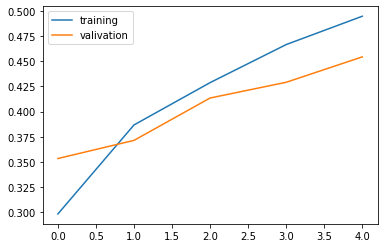

In [18]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

## Evaluate the model

In [19]:
res_2 = model.evaluate(x_test,y_test)
print('loss: {:.3f}, accuracy: {:.3f}'.format(res_2[0], res_2[1]))

10000/10000 [==============================] - 61s 6ms/sample - loss: 1.6945 - accuracy: 0.4374
loss: 1.694, accuracy: 0.437
